In [8]:
import pandas as pd

from riskeye.utils.data import Subject, get_all_subjects, get_all_behavior, get_all_subject_ids
import seaborn as sns
import numpy as np
from tqdm.notebook import tqdm

In [4]:
saccades = []
for subject in tqdm(get_all_subjects()):
    try:
        saccades.append(subject.get_trialwise_saccade_info())
    except Exception as e:
        print(subject.subject_id, e)


saccades = pd.concat(saccades)

  0%|          | 0/64 [00:00<?, ?it/s]

41 [Errno 2] No such file or directory: '/data/ds-riskeye/derivatives/pupil/sub-41/func/sub-41_saccades.tsv'


In [7]:
beh = get_all_behavior()

NameError: name 'get_all_subject' is not defined

In [11]:
Subject('52').get_eyetracker_timings()

subject  run  block  trial  type    
52       1    1      1      rfx         13260186
                            gfx         13261016
                            response    13264017
                     2      rfx         13265767
                            gfx         13266577
                                          ...   
         5    4      23     gfx         16304852
                            response    16306986
                     24     rfx         16309576
                            gfx         16310388
                            response    16312561
Name: timestamp, Length: 1438, dtype: int64

UnsortedIndexError: 'MultiIndex slicing requires the index to be lexsorted: slicing on levels [2], lexsort depth 2'

In [6]:
saccades.loc['52']

KeyError: '52'

In [22]:
sub1 = Subject('01', '/data/ds-riskeye')
saccades = sub1.get_trialwise_saccade_info()

In [36]:
sub1 = Subject('01', '/data/ds-riskeye')
saccades1 = sub1.get_saccades()
messages = sub1.get_eyetracker_timings()
beh1 = sub1.get_behavior()

sub2 = Subject('02', '/data/ds-riskeye')
saccades2 = sub2.get_saccades()
beh2 = sub2.get_behavior()

sub3 = Subject('03', '/data/ds-riskeye')
saccades3 = sub3.get_saccades()

# sub4 = Subject('04', '/data/ds-riskeye')
# saccades4 = sub4.get_saccades()

In [50]:
def summarize_trial_saccades(d):
    d = d[np.in1d(d.fixation_target, ['left_option', 'right_option'])]

    durations = d.groupby('fixation_target')['duration'].sum() 
    # print(durations)

    if len(d) == 0:
        result = pd.DataFrame([{'n_saccades':0}])
    else:
        result = pd.DataFrame([{'n_saccades':len(d), 'first_saccade':d.iloc[0]['fixation_target'], 'last_saccade':d.iloc[-1]['fixation_target']}])
        result['left_duration'] = durations.loc['left_option'] if 'left_option' in durations.index else 0
        result['right_duration'] = durations.loc['right_option'] if 'right_option' in durations.index else 0

    return result

In [89]:
s_summary = saccades1.groupby(['subject', 'run', 'block', 'trial']).apply(summarize_trial_saccades).droplevel(-1)
beh1.join(s_summary).groupby(['p_left', 'first_saccade']).size()

p_left  first_saccade
0.55    left_option      121
        right_option     118
1.00    left_option      169
        right_option      70
dtype: int64

In [90]:
s_summary.groupby(['n_saccades']).size()

n_saccades
0      2
1     20
2     98
3    135
4    143
5     55
6     20
7      7
dtype: int64

In [91]:
s_summary = saccades2.groupby(['subject', 'run', 'block', 'trial']).apply(summarize_trial_saccades).droplevel(-1)
beh2.join(s_summary).groupby(['p_left', 'first_saccade']).size()

p_left  first_saccade
0.55    left_option      140
        right_option     100
1.00    left_option       39
        right_option     201
dtype: int64

In [96]:
s_summary = saccades2.groupby(['subject', 'run', 'block', 'trial']).apply(summarize_trial_saccades).droplevel(-1)
beh2.join(s_summary).groupby(['p_left']).mean()[['left_duration', 'right_duration']]

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_6970/3576866122.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  beh2.join(s_summary).groupby(['p_left']).mean()[['left_duration', 'right_duration']]


,left_duration,right_duration
p_left,,
0.55,936.804167,688.245833
1.00,495.191667,1160.841667


In [92]:
s_summary.groupby(['n_saccades']).size()

n_saccades
1      9
2    155
3    135
4    120
5     47
6     13
7      1
dtype: int64

In [81]:
s_summary.groupby('first_saccade').size()

first_saccade
left_option     290
right_option    188
dtype: int64

p_left  first_saccade
0.55    left_option      121
        right_option     118
1.00    left_option      169
        right_option      70
dtype: int64

In [79]:
s_summary.join)Beh1

SyntaxError: unmatched ')' (1936289313.py, line 1)

In [71]:
beh1.join(s_summary)

AssertionError: Length of order must be same as number of levels (5), got 4

In [68]:
s_summary.describe()

,n_saccades,left_duration,right_duration
count,480.000000,480.000000,480.000000
mean,3.175000,715.997917,924.543750
std,1.135221,476.932060,477.575293
min,1.000000,0.000000,0.000000
25%,2.000000,324.000000,505.000000
50%,3.000000,570.000000,892.000000
75%,4.000000,1036.250000,1293.750000
max,7.000000,2137.000000,2293.000000


In [14]:
saccades1[np.in1d(saccades1.fixation_target, ['left_option', 'right_option'])].groupby(['subject', 'run', 'trial', 'block']).size().describe()

count    478.000000
mean       3.424686
std        1.251237
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
dtype: float64

In [15]:
saccades2[np.in1d(saccades2.fixation_target, ['left_option', 'right_option'])].groupby(['subject', 'run', 'trial', 'block']).size().describe()

count    480.000000
mean       3.175000
std        1.135221
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        7.000000
dtype: float64

In [16]:
saccades3[np.in1d(saccades3.fixation_target, ['left_option', 'right_option'])].groupby(['subject', 'run', 'trial', 'block']).size().describe()

count    472.000000
mean       2.201271
std        0.900435
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
dtype: float64

In [42]:
messages

subject  run  block  trial  type    
01       1    1      1      rfx          812658
                            gfx          813490
                            response     816196
                     2      rfx          818317
                            gfx          819144
                                         ...   
         5    4      23     gfx         3821684
                            response    3824712
                     24     rfx         3826452
                            gfx         3827266
                            response    3829840
Name: timestamp, Length: 1440, dtype: int64

In [32]:
rts = messages.unstack('type')
rts = (rts['response'] - rts['gfx']).to_frame('rt_')

In [34]:
beh1 = beh1.join(rts)

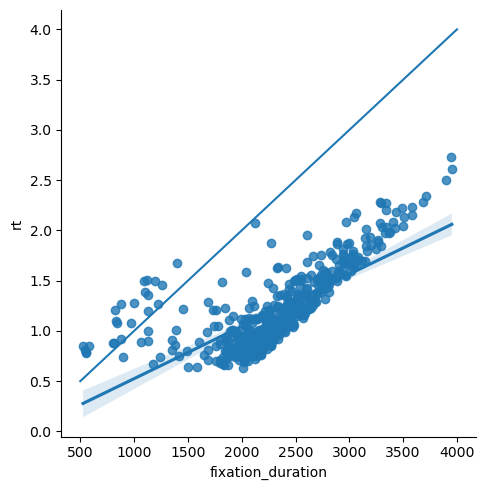

In [35]:
import matplotlib.pyplot as plt
beh1
tmp = saccades1.groupby(['subject', 'run', 'block', 'trial'])[['fixation_duration']].sum().join(beh1)

sns.lmplot(x='fixation_duration', y='rt', data=tmp.reset_index())

plt.plot([500, 4000], [.5, 4])

In [36]:
beh1

accuracy     rt  leftRight  pressedKey  \
subject run block trial exptype                                                
01      1   1     1     symbolic             1  1.215          1          75   
                  2     symbolic             1  0.737         -1          77   
                  3     symbolic             1  0.920         -1          77   
                  4     symbolic             1  0.965         -1          77   
                  5     symbolic             1  1.218          1          75   
...                                        ...    ...        ...         ...   
        5   3     20    non-symbolic         1  2.274          1          75   
                  21    non-symbolic         1  1.512          1          75   
                  22    non-symbolic         1  2.088          1          75   
                  23    non-symbolic         0  0.711         -1          77   
                  24    non-symbolic         0  0.739         -1          77   

                                      n_safe  n_risky  constSide  \
subject run block trial exptype                                    
01      1   1     1     symbolic          14       47          0   
                  2     symbolic           5        6          0   
                  3     symbolic          14       17          0   
                  4     symbolic          10       12          0   
                  5     symbolic          14       28          0   
...                                      ...      ...        ...   
        5   3     20    non-symbolic       5       14          0   
                  21    non-symbolic      10       40          0   
                  22    non-symbolic      20       80          0   
                  23    non-symbolic      14       40          0   
                  24    non-symbolic       5       20          0   

                                      correct_perm  reset    onset  n_left  \
subject run block trial exptype                                              
01      1   1     1     symbolic                -1     -1    6.065      14   
                  2     symbolic                 1     -1   11.708       5   
                  3     symbolic                 1     -1   17.284      14   
                  4     symbolic                 1     -1   22.882      10   
                  5     symbolic                -1     -1   28.471      14   
...                                            ...    ...      ...     ...   
        5   3     20    non-symbolic            -1     -1  390.330       5   
                  21    non-symbolic            -1     -1  395.918      10   
                  22    non-symbolic            -1     -1  401.525      20   
                  23    non-symbolic            -1     -1  407.125      14   
                  24    non-symbolic            -1     -1  412.714       5   

                                      n_right  p_left  p_right  chose_risky  \
subject run block trial exptype                                               
01      1   1     1     symbolic           47     1.0     0.55          1.0   
                  2     symbolic            6     1.0     0.55          0.0   
                  3     symbolic           17     1.0     0.55          0.0   
                  4     symbolic           12     1.0     0.55          0.0   
                  5     symbolic           28     1.0     0.55          1.0   
...                                       ...     ...      ...          ...   
        5   3     20    non-symbolic       14     1.0     0.55          1.0   
                  21    non-symbolic       40     1.0     0.55          1.0   
                  22    non-symbolic       80     1.0     0.55          1.0   
                  23    non-symbolic       40     1.0     0.55          0.0   
                  24    non-symbolic       20     1.0     0.55          0.0   

                                      log(risky/safe)   rt_  
subject

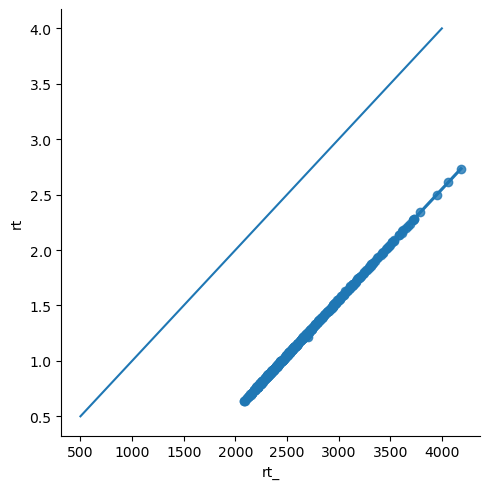

In [40]:
import matplotlib.pyplot as plt
beh1
tmp = saccades1.groupby(['subject', 'run', 'block', 'trial'])[['fixation_duration']].sum().join(beh1)

sns.lmplot(x='rt_', y='rt', data=tmp.reset_index())

plt.plot([500, 4000], [.5, 4])

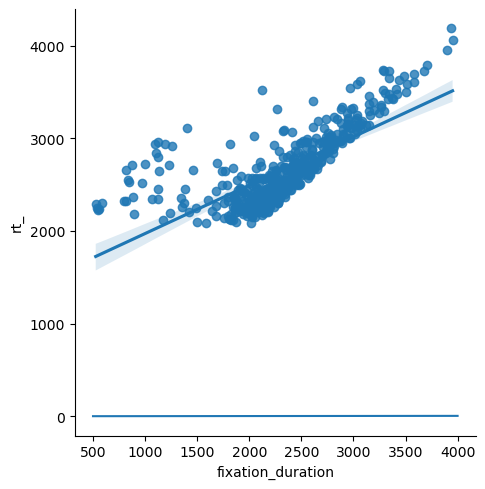

In [37]:
import matplotlib.pyplot as plt
beh1
tmp = saccades1.groupby(['subject', 'run', 'block', 'trial'])[['fixation_duration']].sum().join(beh1)

sns.lmplot(x='fixation_duration', y='rt_', data=tmp.reset_index())

plt.plot([500, 4000], [.5, 4])

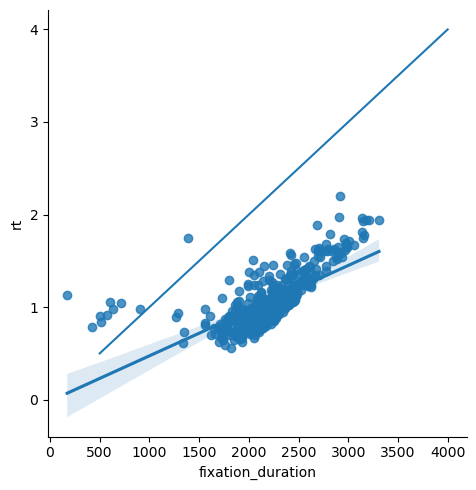

In [14]:
import matplotlib.pyplot as plt
tmp = saccades2.groupby(['subject', 'run', 'block', 'trial'])[['fixation_duration']].sum().join(beh2)

sns.lmplot(x='fixation_duration', y='rt', data=tmp.reset_index())

plt.plot([500, 4000], [.5, 4])

In [12]:
saccades1

n eye  end_timestamp  duration  \
subject run block trial start_timestamp                                      
01      1   1     1     813556             19   L         813584        30   
                        813926             20   L         813944        20   
                        814086             21   L         814126        42   
                        814396             22   L         814402         8   
                        814496             23   L         814524        30   
...                                       ...  ..            ...       ...   
        5   4     96    3828268          1436   L        3828292        26   
                        3828602          1437   L        3828654        54   
                        3828906          1438   L        3828960        56   
                        3829218          1439   L        3829262        46   
                        3829456          1440   L        3829496        42   

                                         start_x  start_y  end_x  end_y   amp  \
subject run block trial start_timestamp                                         
01      1   1     1     813556             667.1    515.9  538.8  464.5  4.38   
                        813926             542.1    467.1  499.1  499.3  1.66   
                        814086             508.7    491.3  652.3  502.7  4.61   
                        814396             668.6    519.8  655.2  517.0  0.44   
                        814496             656.7    511.8  818.0  497.0  5.16   
...                                          ...      ...    ...    ...   ...   
        5   4     96    3828268            745.6    499.6  641.3  491.5  3.35   
                        3828602            658.0    488.2  811.0  507.9  4.91   
                        3828906            816.0    488.1  514.5  493.8  9.60   
                        3829218            493.6    500.8  536.6  501.3  1.37   
                        3829456            549.1    483.7  630.1  489.5  2.60   

                                         peak_velocity  fixation_duration  \
subject run block trial start_timestamp                                     
01      1   1     1     813556                     273                360   
                        813926                     136                182   
                        814086                     451                276   
                        814396                      61                122   
                        814496                     421                268   
...                                                ...                ...   
        5   4     96    3828268                    276                362   
                        3828602                    371                306   
                        3828906                    574                302   
                        3829218                    125                234   
                        3829456                    276                344   

                                        fixation_target  
subject run block trial start_timestamp                  
01      1   1     1     813556              center_left  
                        813926              left_option  
                        814086                 fixation  
                        814396                 fixation  
                        814496             right_option  
...                                                 ...  
        5   4     96    3828268                fixation  
                        3828602            right_option  
                        3828906             left_option  
                        3829218             left_option  
                        3829456                fixation  

[3963 rows x 12 columns]

In [14]:
beh1

accuracy     rt  leftRight  pressedKey  \
subject run exptype      block trial                                           
1       1   symbolic     1     1             1  1.215          1          75   
                               2             1  0.737         -1          77   
                               3             1  0.920         -1          77   
                               4             1  0.965         -1          77   
                               5             1  1.218          1          75   
...                                        ...    ...        ...         ...   
        5   non-symbolic 3     20            1  2.274          1          75   
                               21            1  1.512          1          75   
                               22            1  2.088          1          75   
                               23            0  0.711         -1          77   
                               24            0  0.739         -1          77   

                                      n_safe  n_risky  constSide  \
subject run exptype      block trial                               
1       1   symbolic     1     1          14       47          0   
                               2           5        6          0   
                               3          14       17          0   
                               4          10       12          0   
                               5          14       28          0   
...                                      ...      ...        ...   
        5   non-symbolic 3     20          5       14          0   
                               21         10       40          0   
                               22         20       80          0   
                               23         14       40          0   
                               24          5       20          0   

                                      correct_perm  reset    onset  n_left  \
subject run exptype      block trial                                         
1       1   symbolic     1     1                -1     -1    6.065      14   
                               2                 1     -1   11.708       5   
                               3                 1     -1   17.284      14   
                               4                 1     -1   22.882      10   
                               5                -1     -1   28.471      14   
...                                            ...    ...      ...     ...   
        5   non-symbolic 3     20               -1     -1  390.330       5   
                               21               -1     -1  395.918      10   
                               22               -1     -1  401.525      20   
                               23               -1     -1  407.125      14   
                               24               -1     -1  412.714       5   

                                      n_right  p_left  p_right  chose_risky  \
subject run exptype      block trial                                          
1       1   symbolic     1     1           47     1.0     0.55          1.0   
                               2            6     1.0     0.55          0.0   
                               3           17     1.0     0.55          0.0   
                               4           12     1.0     0.55          0.0   
                               5           28     1.0     0.55          1.0   
...                                       ...     ...      ...          ...   
        5   non-symbolic 3     20          14     1.0     0.55          1.0   
                               21          40     1.0     0.55          1.0   
                               22          80     1.0     0.55          1.0   
                               23          40     1.0     0.55          0.0   
                               24          20     1.0     0.55          0.0   

                                      log(risky/safe)  
subject run e

In [3]:
import numpy as np

def merge_fixations(d):

    d['previous_fixation_target'] = d['fixation_target'].shift(1)

    result = []

    n = 1
    duration = 0.0

    for ix, row in d.iterrows():
        if (row.fixation_target == row['previous_fixation_target']) or (pd.isnull(row.previous_fixation_target)):
            duration += row.fixation_duration
        else:
            result.append({'duration':duration, 'fixation_target':row.previous_fixation_target})
            duration = row.fixation_duration
            n += 1

    if duration != 0:
        result.append({'duration':duration, 'fixation_target':row.fixation_target})

    return pd.DataFrame(result, index=pd.Index(np.arange(1, n+1), name='n'))


In [10]:
saccades1

n eye  end_timestamp  duration  \
subject run block trial start_timestamp                                      
01      1   1     1     813556             19   L         813584        30   
                        813926             20   L         813944        20   
                        814086             21   L         814126        42   
                        814396             22   L         814402         8   
                        814496             23   L         814524        30   
...                                       ...  ..            ...       ...   
        5   4     24    3828268          1436   L        3828292        26   
                        3828602          1437   L        3828654        54   
                        3828906          1438   L        3828960        56   
                        3829218          1439   L        3829262        46   
                        3829456          1440   L        3829496        42   

                                         start_x  start_y  end_x  end_y   amp  \
subject run block trial start_timestamp                                         
01      1   1     1     813556             667.1    515.9  538.8  464.5  4.38   
                        813926             542.1    467.1  499.1  499.3  1.66   
                        814086             508.7    491.3  652.3  502.7  4.61   
                        814396             668.6    519.8  655.2  517.0  0.44   
                        814496             656.7    511.8  818.0  497.0  5.16   
...                                          ...      ...    ...    ...   ...   
        5   4     24    3828268            745.6    499.6  641.3  491.5  3.35   
                        3828602            658.0    488.2  811.0  507.9  4.91   
                        3828906            816.0    488.1  514.5  493.8  9.60   
                        3829218            493.6    500.8  536.6  501.3  1.37   
                        3829456            549.1    483.7  630.1  489.5  2.60   

                                         peak_velocity  fixation_duration  \
subject run block trial start_timestamp                                     
01      1   1     1     813556                     273                360   
                        813926                     136                182   
                        814086                     451                276   
                        814396                      61                122   
                        814496                     421                268   
...                                                ...                ...   
        5   4     24    3828268                    276                362   
                        3828602                    371                306   
                        3828906                    574                302   
                        3829218                    125                234   
                        3829456                    276                344   

                                        fixation_target  
subject run block trial start_timestamp                  
01      1   1     1     813556              center_left  
                        813926              left_option  
                        814086                 fixation  
                        814396                 fixation  
                        814496             right_option  
...                                                 ...  
        5   4     24    3828268                fixation  
                        3828602            right_option  
                        3828906             left_option  
                        3829218             left_option  
                        3829456                fixation  

[3963 rows x 12 columns]

In [16]:
saccades1.groupby(['subject', 'run', 'block', 'trial'])[['fixation_duration']].sum()

fixation_duration
subject run block trial                   
01      1   1     1                   2612
                  2                   1941
                  3                   2339
                  4                   2321
                  5                   2530
...                                    ...
        5   4     20                  2143
                  21                  1872
                  22                  1174
                  23                  2042
                  24                  2068

[480 rows x 1 columns]

In [17]:
beh1

accuracy     rt  leftRight  pressedKey  \
subject run exptype      block trial                                           
1       1   symbolic     1     1             1  1.215          1          75   
                               2             1  0.737         -1          77   
                               3             1  0.920         -1          77   
                               4             1  0.965         -1          77   
                               5             1  1.218          1          75   
...                                        ...    ...        ...         ...   
        5   non-symbolic 3     236           1  2.274          1          75   
                               237           1  1.512          1          75   
                               238           1  2.088          1          75   
                               239           0  0.711         -1          77   
                               240           0  0.739         -1          77   

                                      n_safe  n_risky  constSide  \
subject run exptype      block trial                               
1       1   symbolic     1     1          14       47          0   
                               2           5        6          0   
                               3          14       17          0   
                               4          10       12          0   
                               5          14       28          0   
...                                      ...      ...        ...   
        5   non-symbolic 3     236         5       14          0   
                               237        10       40          0   
                               238        20       80          0   
                               239        14       40          0   
                               240         5       20          0   

                                      correct_perm  reset    onset  n_left  \
subject run exptype      block trial                                         
1       1   symbolic     1     1                -1     -1    6.065      14   
                               2                 1     -1   11.708       5   
                               3                 1     -1   17.284      14   
                               4                 1     -1   22.882      10   
                               5                -1     -1   28.471      14   
...                                            ...    ...      ...     ...   
        5   non-symbolic 3     236              -1     -1  390.330       5   
                               237              -1     -1  395.918      10   
                               238              -1     -1  401.525      20   
                               239              -1     -1  407.125      14   
                               240              -1     -1  412.714       5   

                                      n_right  p_left  p_right  chose_risky  \
subject run exptype      block trial                                          
1       1   symbolic     1     1           47     1.0     0.55          1.0   
                               2            6     1.0     0.55          0.0   
                               3           17     1.0     0.55          0.0   
                               4           12     1.0     0.55          0.0   
                               5           28     1.0     0.55          1.0   
...                                       ...     ...      ...          ...   
        5   non-symbolic 3     236         14     1.0     0.55          1.0   
                               237         40     1.0     0.55          1.0   
                               238         80     1.0     0.55          1.0   
                               239         40     1.0     0.55          0.0   
                               240         20     1.0     0.55          0.0   

                                      log(risky/safe)  
subject run e

In [5]:
saccades1.groupby(['subject', 'run', 'trial'])

duration
subject run block trial          
01      1   1     1           356
                  2           178
                  3           264
                  4           150
                  5           248
...                           ...
        5   4     20          446
                  21          212
                  22          212
                  23          168
                  24          520

[480 rows x 1 columns]

In [6]:
beh1.join()

accuracy     rt  leftRight  pressedKey  \
subject run exptype      block trial                                           
1       1   symbolic     1     1             1  1.215          1          75   
                               2             1  0.737         -1          77   
                               3             1  0.920         -1          77   
                               4             1  0.965         -1          77   
                               5             1  1.218          1          75   
...                                        ...    ...        ...         ...   
        5   non-symbolic 3     236           1  2.274          1          75   
                               237           1  1.512          1          75   
                               238           1  2.088          1          75   
                               239           0  0.711         -1          77   
                               240           0  0.739         -1          77   

                                      n_safe  n_risky  constSide  \
subject run exptype      block trial                               
1       1   symbolic     1     1          14       47          0   
                               2           5        6          0   
                               3          14       17          0   
                               4          10       12          0   
                               5          14       28          0   
...                                      ...      ...        ...   
        5   non-symbolic 3     236         5       14          0   
                               237        10       40          0   
                               238        20       80          0   
                               239        14       40          0   
                               240         5       20          0   

                                      correct_perm  reset    onset  n_left  \
subject run exptype      block trial                                         
1       1   symbolic     1     1                -1     -1    6.065      14   
                               2                 1     -1   11.708       5   
                               3                 1     -1   17.284      14   
                               4                 1     -1   22.882      10   
                               5                -1     -1   28.471      14   
...                                            ...    ...      ...     ...   
        5   non-symbolic 3     236              -1     -1  390.330       5   
                               237              -1     -1  395.918      10   
                               238              -1     -1  401.525      20   
                               239              -1     -1  407.125      14   
                               240              -1     -1  412.714       5   

                                      n_right  p_left  p_right  chose_risky  \
subject run exptype      block trial                                          
1       1   symbolic     1     1           47     1.0     0.55          1.0   
                               2            6     1.0     0.55          0.0   
                               3           17     1.0     0.55          0.0   
                               4           12     1.0     0.55          0.0   
                               5           28     1.0     0.55          1.0   
...                                       ...     ...      ...          ...   
        5   non-symbolic 3     236         14     1.0     0.55          1.0   
                               237         40     1.0     0.55          1.0   
                               238         80     1.0     0.55          1.0   
                               239         40     1.0     0.55          0.0   
                               240         20     1.0     0.55          0.0   

                                      log(risky/safe)  
subject run e

In [78]:
saccades1.groupby(['subject', 'run', 'block', 'trial']).apply(merge_fixations).head(50)

duration fixation_target
subject run block trial n                          
01      1   1     1     1     360.0     center_left
                        2     182.0     left_option
                        3     398.0        fixation
                        4     268.0    right_option
                        5     408.0        fixation
                        6     234.0    right_option
                        7     562.0     left_option
                        8     200.0        fixation
                  2     1    1458.0        fixation
                        2     266.0     center_left
                        3     217.0    right_option
                  3     1    1700.0        fixation
                        2     208.0     left_option
                        3     234.0    right_option
                        4     197.0        fixation
                  4     1     248.0    center_right
                        2    1810.0        fixation
                        3     263.0    right_option
                  5     1    1812.0        fixation
                        2     364.0    right_option
                        3     354.0        fixation
                  6     1    1522.0        fixation
                        2     248.0     left_option
                        3     294.0    right_option
                        4     112.0        fixation
                  7     1    1594.0        fixation
                        2     392.0    right_option
                        3     507.0     left_option
                  8     1     212.0        fixation
                        2     338.0    right_option
                        3    1132.0        fixation
                        4     352.0    right_option
                        5     292.0        fixation
                  9     1     998.0        fixation
                        2     248.0    right_option
                        3     210.0        fixation
                        4     216.0    right_option
                        5     310.0     left_option
                        6     230.0        fixation
                        7      48.0    right_option
                  10    1     638.0        fixation
                        2     156.0    center_right
                        3     910.0        fixation
                        4     274.0    right_option
                        5     199.0        fixation
                  11    1    1582.0        fixation
                        2     282.0    right_option
                        3     322.0     left_option
                  12    1     666.0        fixation
                        2     538.0    right_option

In [69]:
merge_fixations(saccades1)

nan False
center_left False
left_option False
fixation False
fixation False
right_option False
fixation False
fixation False
right_option False
left_option False
left_option False
fixation False
fixation False
fixation False
fixation False
center_left False
right_option False
fixation False
fixation False
fixation False
fixation False
fixation False
fixation False
left_option False
right_option False
fixation False
center_right False
fixation False
fixation False
fixation False
fixation False
right_option False
fixation False
fixation False
fixation False
fixation False
fixation False
fixation False
right_option False
fixation False
fixation False
fixation False
fixation False
fixation False
fixation False
fixation False
left_option False
right_option False
fixation False
fixation False
fixation False
fixation False
right_option False
right_option False
left_option False
fixation False
right_option False
fixation False
fixation False
fixation False
right_option False
fixation False
fix

,duration,fixation_target
n,,
1,360.0,left_option
2,182.0,fixation
3,398.0,right_option
4,268.0,fixation
5,408.0,right_option
...,...,...
2470,230.0,fixation
2471,362.0,right_option
2472,306.0,left_option


In [6]:
saccades1['fixation_target'].shift(-1)

subject  run  block  trial  start_timestamp
01       1    1      1      813556              left_option
                            813926                 fixation
                            814086                 fixation
                            814396             right_option
                            814496                 fixation
                                                   ...     
         5    4      24     3828268            right_option
                            3828602             left_option
                            3828906             left_option
                            3829218                fixation
                            3829456                     NaN
Name: fixation_target, Length: 3963, dtype: category
Categories (7, object): ['outside_left' < 'left_option' < 'center_left' < 'fixation' < 'center_right' < 'right_option' < 'outside_right']

In [9]:
messages = messages.unstack("type")

In [18]:
saccades_per_block = saccades1

def get_durations(df):
    durations =  df.iloc[1:]['end_timestamp'].values - df.iloc[:-1]['end_timestamp']
    durations.index = df.iloc[:-1].index

    # durations = durations.append(df.iloc[-1]['end_timestamp'], messages)
    last_trial = df.iloc[-1]
    durations = pd.concat((durations, pd.Series([messages.loc[last_trial.name[:4], 'response'] - last_trial['end_timestamp']], index=df.iloc[-1:].index)))
    durations = durations
    return durations

saccades_per_block['fixation_duration'] = saccades_per_block.groupby(['subject', 'run', 'block', 'trial'], group_keys=False).apply(get_durations)
saccades_per_block = saccades_per_block[saccades_per_block.fixation_duration > 0.0]


In [19]:
saccades_per_block.sort_values('fixation_duration')

n eye  end_timestamp  duration  \
subject run block trial start_timestamp                                      
01      2   4     18    1958252          1327   L        1958308        58   
        1   2     21    1067724           745   L        1067738        16   
        2   2     18    1678544           649   L        1678606        64   
        5   3     17    3650604           971   L        3650674        72   
        3   1     19    2180722           257   L        2180746        26   
...                                       ...  ..            ...       ...   
        5   3     3     3570370           755   L        3570386        18   
        1   3     24    1221750          1195   L        1221770        22   
        4   2     15    2897658           664   L        2897726        70   
            3     18    3054340          1026   L        3054366        28   
            4     18    3194000          1326   L        3194032        34   

                                         start_x  start_y  end_x  end_y  \
subject run block trial start_timestamp                                   
01      2   4     18    1958252            720.8    448.6  430.3  491.9   
        1   2     21    1067724           1014.8    467.1  993.9  487.4   
        2   2     18    1678544            925.2    430.5  508.0  520.8   
        5   3     17    3650604            371.8    437.8  917.4  463.3   
        3   1     19    2180722            873.6    544.6  791.5  528.2   
...                                          ...      ...    ...    ...   
        5   3     3     3570370            624.9    425.2  616.8  455.6   
        1   3     24    1221750            646.5    519.0  631.2  476.4   
        4   2     15    2897658            936.1    763.3  493.9  397.6   
            3     18    3054340            486.3    511.9  637.9  484.6   
            4     18    3194000            624.5    482.9  655.8  475.9   

                                           amp  peak_velocity  \
subject run block trial start_timestamp                         
01      2   4     18    1958252           9.34            452   
        1   2     21    1067724           0.87             83   
        2   2     18    1678544          13.44            605   
        5   3     17    3650604          17.15            666   
        3   1     19    2180722           2.64            205   
...                                        ...            ...   
        5   3     3     3570370           0.93             80   
        1   3     24    1221750           1.33            101   
        4   2     15    2897658          17.28            735   
            3     18    3054340           4.92            409   
            4     18    3194000           1.03            175   

                                         fixation_duration fixation_target  
subject run block trial start_timestamp                                     
01      2   4     18    1958252                          1     left_option  
        1   2     21    1067724                          1   outside_right  
        2   2     18    1678544                          3     left_option  
        5   3     17    3650604                          5    right_option  
        3   1     19    2180722                          5    right_option  
...                                                    ...             ...  
        5   3     3     3570370                       1376        fixation  
        1   3     24    1221750                       1398        fixation  
        4   2     15    2897658                       1452     left_option  
            3     18    3054340                       1464        fixation  
            4     18    3194000                       1564        fixation  

[3963 rows x 12 columns]

In [20]:
saccades1.loc[('01', 2, 4, 18)]

,n,eye,end_timestamp,duration,start_x,start_y,end_x,end_y,amp,peak_velocity,fixation_duration,fixation_target
start_timestamp,,,,,,,,,,,,
1955674,1317,L,1955700,28,485.9,340.5,380.6,288.6,3.68,258,326,left_option
1955970,1318,L,1956026,58,385.0,315.3,596.8,473.5,8.18,491,292,fixation
1956274,1319,L,1956318,46,606.1,497.8,385.2,265.5,9.76,521,220,left_option
1956520,1320,L,1956538,20,383.6,266.0,336.8,267.4,1.47,125,324,left_option
1956840,1321,L,1956862,24,324.8,277.2,413.7,270.6,2.81,211,256,left_option
1957078,1322,L,1957118,42,422.1,255.3,289.9,298.9,4.34,364,212,left_option
1957290,1323,L,1957330,42,277.4,322.6,373.2,409.8,3.91,415,170,left_option
1957438,1324,L,1957500,64,389.7,420.1,885.6,444.9,15.66,739,262,right_option
1957730,1325,L,1957762,34,902.3,463.0,946.7,478.1,1.46,188,392,right_option


In [4]:
saccades1.sort_values('fixation_duration')

n eye  end_timestamp  duration  \
subject run block trial start_timestamp                                      
01      4   4     5     3123982          1159   L        3124196       216   
        3   4     13    2567036          1345   L        2567262       228   
        5   4     13    3768192          1281   L        3768454       264   
                  14    3773880          1299   L        3774160       282   
        3   2     18    2315510           630   L        2315686       178   
...                                       ...  ..            ...       ...   
        5   3     3     3570370           755   L        3570386        18   
        1   3     24    1221750          1195   L        1221770        22   
        4   2     15    2897658           664   L        2897726        70   
            3     18    3054340          1026   L        3054366        28   
            4     18    3194000          1326   L        3194032        34   

                                         start_x  start_y  end_x  end_y  \
subject run block trial start_timestamp                                   
01      4   4     5     3123982            687.1    534.7  657.9  564.0   
        3   4     13    2567036            373.8    496.9  578.2  386.8   
        5   4     13    3768192            441.7    491.5  529.1  512.5   
                  14    3773880            424.6    487.5  551.8  520.2   
        3   2     18    2315510            996.1    489.1  907.2  364.0   
...                                          ...      ...    ...    ...   
        5   3     3     3570370            624.9    425.2  616.8  455.6   
        1   3     24    1221750            646.5    519.0  631.2  476.4   
        4   2     15    2897658            936.1    763.3  493.9  397.6   
            3     18    3054340            486.3    511.9  637.9  484.6   
            4     18    3194000            624.5    482.9  655.8  475.9   

                                           amp  peak_velocity  \
subject run block trial start_timestamp                         
01      4   4     5     3123982           1.26            363   
        3   4     13    2567036           7.24            742   
        5   4     13    3768192           2.85           2104   
                  14    3773880           4.15           1526   
        3   2     18    2315510           4.55           2033   
...                                        ...            ...   
        5   3     3     3570370           0.93             80   
        1   3     24    1221750           1.33            101   
        4   2     15    2897658          17.28            735   
            3     18    3054340           4.92            409   
            4     18    3194000           1.03            175   

                                         fixation_duration fixation_target  
subject run block trial start_timestamp                                     
01      4   4     5     3123982                       -198        fixation  
        3   4     13    2567036                       -141        fixation  
        5   4     13    3768192                       -107     left_option  
                  14    3773880                        -82     center_left  
        3   2     18    2315510                        -81    right_option  
...                                                    ...             ...  
        5   3     3     3570370                       1328        fixation  
        1   3     24    1221750                       1340        fixation  
        4   2     15    2897658                       1402     left_option  
            3     18    3054340                       1420        fixation  
            4     18    3194000                       1538        fixation  

[4026 rows x 12 columns]

In [11]:
saccades1.loc[('01', 3, 4, 13)]

,n,eye,end_timestamp,duration,start_x,start_y,end_x,end_y,amp,peak_velocity,fixation_duration,fixation_target
start_timestamp,,,,,,,,,,,,
2563956,1332,L,2563972,18,655.9,256.9,654.1,290.4,0.99,114,216,fixation
2564188,1333,L,2564232,46,652.2,300.4,673.3,455.7,4.60,476,322,fixation
2564554,1334,L,2564620,68,693.1,507.7,382.3,297.7,11.63,464,216,left_option
2564836,1335,L,2564892,58,399.7,256.7,292.3,430.6,6.06,397,170,left_option
2565062,1336,L,2565112,52,293.6,426.6,391.7,293.9,4.92,492,220,left_option
2565332,1337,L,2565350,20,387.9,275.3,390.3,256.7,0.55,78,166,left_option
2565516,1338,L,2565574,60,386.1,273.1,503.1,447.3,6.30,406,114,left_option
2565688,1339,L,2565746,60,504.4,464.7,892.4,463.8,12.32,713,206,right_option
2565952,1340,L,2566026,76,918.2,482.0,413.1,485.4,15.91,678,140,left_option


In [10]:
3123998 - 3123982

16

In [9]:
messages.loc[('01', 4, 4, 5)]

type
rfx         3120395
gfx         3121205
response    3123998
Name: timestamp, dtype: int64

In [ ]:
saccades1[saccades1.fixation_duration < 0]

n eye  end_timestamp  duration  \
subject run block trial start_timestamp                                      
01      1   1     8     855032            143   L         855064        34   
            2     5     978314            471   L         978356        44   
                  13    1022992           612   L        1023040        50   
                  15    1034278           649   L        1034342        66   
                  19    1056332           712   L        1056442       112   
...                                       ...  ..            ...       ...   
        5   3     1     3561198           729   L        3561242        46   
                  10    3611554           854   L        3611612        60   
            4     13    3768192          1281   L        3768454       264   
                  14    3773880          1299   L        3774160       282   
                  23    3824408          1427   L        3824748       342   

                                         start_x  start_y  end_x  end_y  \
subject run block trial start_timestamp                                   
01      1   1     8     855032             617.0    505.7  637.4  514.1   
            2     5     978314             973.4    523.9  925.8  358.3   
                  13    1022992            590.4    410.9  435.3  440.6   
                  15    1034278            381.2    443.4  823.8  416.0   
                  19    1056332            904.4    493.4  633.5  400.9   
...                                          ...      ...    ...    ...   
        5   3     1     3561198            343.4    288.6  365.5  411.1   
                  10    3611554            926.2    431.9  695.6  465.7   
            4     13    3768192            441.7    491.5  529.1  512.5   
                  14    3773880            424.6    487.5  551.8  520.2   
                  23    3824408            457.8    488.4  558.0  433.6   

                                           amp  peak_velocity  \
subject run block trial start_timestamp                         
01      1   1     8     855032            0.70            146   
            2     5     978314            4.99            217   
                  13    1022992           5.03            437   
                  15    1034278          14.05            668   
                  19    1056332           9.02            517   
...                                        ...            ...   
        5   3     1     3561198           3.62            358   
                  10    3611554           7.37            422   
            4     13    3768192           2.85           2104   
                  14    3773880           4.15           1526   
                  23    3824408           3.58           3046   

                                         fixation_duration fixation_target  
subject run block trial start_timestamp                                     
01      1   1     8     855032                          -2        fixation  
            2     5     978314                         -18    right_option  
                  13    1022992                        -18     left_option  
                  15    1034278                        -24    right_option  
                  19    1056332                        -10        fixation  
...                                                    ...             ...  
        5   3     1     3561198                        -32     left_option  
                  10    3611554                        -30        fixation  
            4     13    3768192                       -107     left_option  
                  14    3773880                        -82     center_left  
                  23    3824408                        -36     center_left  

[61 rows x 12 columns]

<Axes: xlabel='fixation_duration', ylabel='Count'>

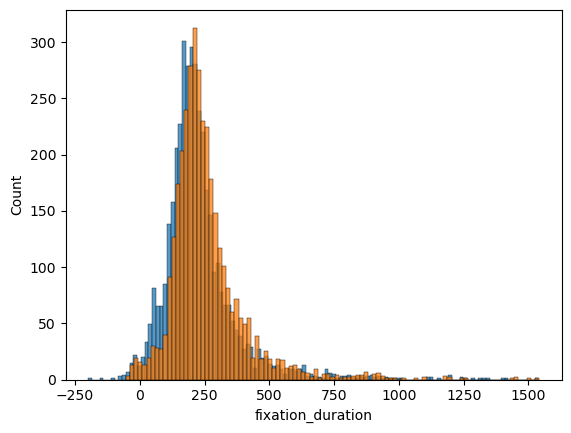

In [ ]:
sns.histplot(saccades1['fixation_duration'])
sns.histplot(saccades2['fixation_duration'])

In [4]:
saccades1

n eye  end_timestamp  duration  \
subject run block trial start_timestamp                                      
01      1   1     1     813556             19   L         813584        30   
                        813926             20   L         813944        20   
                        814086             21   L         814126        42   
                        814396             22   L         814402         8   
                        814496             23   L         814524        30   
...                                       ...  ..            ...       ...   
        5   4     24    3828268          1436   L        3828292        26   
                        3828602          1437   L        3828654        54   
                        3828906          1438   L        3828960        56   
                        3829218          1439   L        3829262        46   
                        3829456          1440   L        3829496        42   

                                         start_x  start_y  end_x  end_y   amp  \
subject run block trial start_timestamp                                         
01      1   1     1     813556             667.1    515.9  538.8  464.5  4.38   
                        813926             542.1    467.1  499.1  499.3  1.66   
                        814086             508.7    491.3  652.3  502.7  4.61   
                        814396             668.6    519.8  655.2  517.0  0.44   
                        814496             656.7    511.8  818.0  497.0  5.16   
...                                          ...      ...    ...    ...   ...   
        5   4     24    3828268            745.6    499.6  641.3  491.5  3.35   
                        3828602            658.0    488.2  811.0  507.9  4.91   
                        3828906            816.0    488.1  514.5  493.8  9.60   
                        3829218            493.6    500.8  536.6  501.3  1.37   
                        3829456            549.1    483.7  630.1  489.5  2.60   

                                         peak_velocity  fixation_duration  
subject run block trial start_timestamp                                    
01      1   1     1     813556                     273                342  
                        813926                     136                142  
                        814086                     451                270  
                        814396                      61                 94  
                        814496                     421                238  
...                                                ...                ...  
        5   4     24    3828268                    276                310  
                        3828602                    371                252  
                        3828906                    574                258  
                        3829218                    125                194  
                        3829456                    276                344  

[4026 rows x 11 columns]

In [5]:
def get_durations(df):
    durations =  df.iloc[1:].index.get_level_values('start_timestamp') - df.iloc[:-1]['end_timestamp']
    durations.index = df.iloc[:-1].index

    # durations = durations.append(df.iloc[-1]['end_timestamp'], messages)
    last_trial = df.iloc[-1]
    durations = pd.concat((durations, pd.Series([messages.loc[last_trial.name[:4] + ('response',)] - last_trial['end_timestamp']], index=df.iloc[-1:].index)))
    return durations

print(saccades1)
print(saccades1.groupby(['subject', 'run', 'block', 'trial'], group_keys=False).apply(get_durations))

# saccades_per_block['fixation_duration'] = saccades_per_block.groupby(['subject', 'run', 'block', 'trial'], group_keys=False).apply(get_durations)


                                            n eye  end_timestamp  duration  \
subject run block trial start_timestamp                                      
01      1   1     1     813556             19   L         813584        30   
                        813926             20   L         813944        20   
                        814086             21   L         814126        42   
                        814396             22   L         814402         8   
                        814496             23   L         814524        30   
...                                       ...  ..            ...       ...   
        5   4     24    3828268          1436   L        3828292        26   
                        3828602          1437   L        3828654        54   
                        3828906          1438   L        3828960        56   
                        3829218          1439   L        3829262        46   
                        3829456          1440   L        3829496

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_61973/1885469205.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saccades1['end_x'])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_61973/1885469205.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saccades2['end_x'])


<Axes: xlabel='end_x', ylabel='Density'>

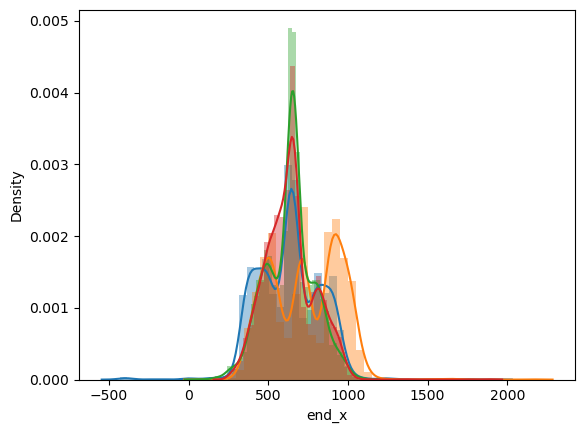

In [ ]:
sns.distplot(saccades1['end_x'])
sns.distplot(saccades2['end_x'])
sns.distplot(saccades3['end_x'])
sns.distplot(saccades4['end_x'])

In [ ]:
saccades1

In [14]:
import statsmodels.api as sm

<Axes: xlabel='subject,run,block,trial,start_timestamp'>

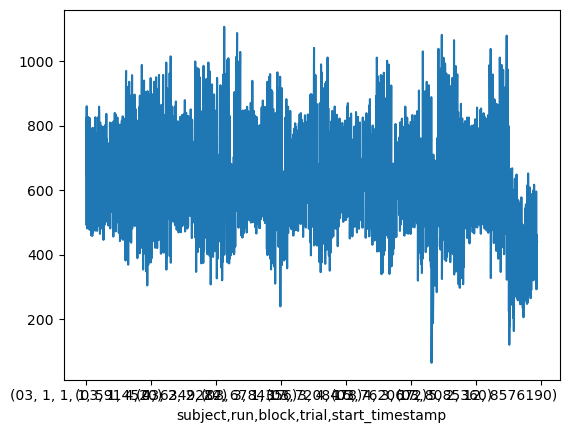

In [25]:
saccades3['end_x'].plot()

In [21]:
sm.OLS(saccades3.end_x, sm.add_constant(saccades3.end_timestamp) ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  end_x   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     146.5
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           4.66e-33
Time:                        09:51:20   Log-Likelihood:                -22250.
No. Observations:                3470   AIC:                         4.450e+04
Df Residuals:                    3468   BIC:                         4.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           892.1774     21.281     41.923      0.000     850.453     933.902
end_timestamp -3.443e-05   2.84e-06    -12.103      0.000      -4e-05   -2.89e-05
==============================================================================
Omnibus:                        5.385   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.331
Skew:                           0.094   Prob(JB):                       0.0696
Kurtosis:                       3.039   Cond. No.                     6.36e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='subject,run,block,trial,start_timestamp'>

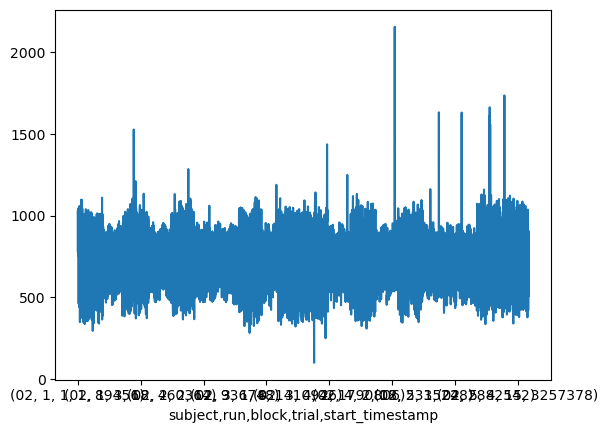

In [13]:
saccades['end_x'].plot()

In [33]:
messages

subject  run  block  trial  type    
03       1    1      1      rfx         5913266
                            gfx         5914110
                            response    5916574
                     2      rfx         5918913
                            gfx         5919743
                                         ...   
         5    4      23     gfx         8914074
                            response    8916395
                     24     rfx         8918844
                            gfx         8919653
                            response    8922090
Name: timestamp, Length: 1440, dtype: int64

In [34]:
messages = messages.unstack('type')

In [102]:
saccades_per_block = []
for ix, row in messages.iterrows():
    s = saccades.loc[(ix[0], ix[1], slice(row.gfx, row.response)), :]
    saccades_per_block.append(s.droplevel([0, 1]))

saccades_per_block = pd.concat(saccades_per_block, keys=messages.index)

AttributeError: 'Series' object has no attribute 'iterrows'

In [87]:
saccades1

n eye  end_timestamp  duration  \
subject run block trial start_timestamp                                      
01      1   1     1     813556             19   L         813584        30   
                        813926             20   L         813944        20   
                        814086             21   L         814126        42   
                        814396             22   L         814402         8   
                        814496             23   L         814524        30   
...                                       ...  ..            ...       ...   
        5   4     24    3828268          1436   L        3828292        26   
                        3828602          1437   L        3828654        54   
                        3828906          1438   L        3828960        56   
                        3829218          1439   L        3829262        46   
                        3829456          1440   L        3829496        42   

                                         start_x  start_y  end_x  end_y   amp  \
subject run block trial start_timestamp                                         
01      1   1     1     813556             667.1    515.9  538.8  464.5  4.38   
                        813926             542.1    467.1  499.1  499.3  1.66   
                        814086             508.7    491.3  652.3  502.7  4.61   
                        814396             668.6    519.8  655.2  517.0  0.44   
                        814496             656.7    511.8  818.0  497.0  5.16   
...                                          ...      ...    ...    ...   ...   
        5   4     24    3828268            745.6    499.6  641.3  491.5  3.35   
                        3828602            658.0    488.2  811.0  507.9  4.91   
                        3828906            816.0    488.1  514.5  493.8  9.60   
                        3829218            493.6    500.8  536.6  501.3  1.37   
                        3829456            549.1    483.7  630.1  489.5  2.60   

                                         peak_velocity fixation_target  
subject run block trial start_timestamp                                 
01      1   1     1     813556                     273     center_left  
                        813926                     136     left_option  
                        814086                     451        fixation  
                        814396                      61        fixation  
                        814496                     421    right_option  
...                                                ...             ...  
        5   4     24    3828268                    276        fixation  
                        3828602                    371    right_option  
                        3828906                    574     left_option  
                        3829218                    125     left_option  
                        3829456                    276        fixation  

[4026 rows x 11 columns]

In [98]:
messages

subject  run  block  trial  type    
03       1    1      1      rfx         5913266
                            gfx         5914110
                            response    5916574
                     2      rfx         5918913
                            gfx         5919743
                                         ...   
         5    4      23     gfx         8914074
                            response    8916395
                     24     rfx         8918844
                            gfx         8919653
                            response    8922090
Name: timestamp, Length: 1441, dtype: int64

In [97]:
saccades

n eye  end_timestamp  duration  \
subject run block trial start_timestamp                                      
03      1   1     1     5914520            29   L        5914552        34   
                        5915482            30   L        5915492        12   
                        5915790            31   L        5915806        18   
                        5915874            32   L        5915930        58   
                        5916396            33   L        5916454        60   
...                                       ...  ..            ...       ...   
        5   4     24    8920008          1653   L        8920018        12   
                        8920220          1654   L        8920228        10   
                        8920438          1655   L        8920450        14   
                        8921200          1656   L        8921204         6   
                        8921670          1657   L        8921832       164   

                                         start_x  start_y  end_x  end_y  \
subject run block trial start_timestamp                                   
03      1   1     1     5914520            786.0    503.8  821.5  473.3   
                        5915482            817.7    478.5  799.2  470.6   
                        5915790            807.3    470.9  824.4  469.6   
                        5915874            820.4    472.8  491.4  459.4   
                        5916396            496.5    476.6  860.6  482.0   
...                                          ...      ...    ...    ...   
        5   4     24    8920008            445.0    451.5  436.6  465.9   
                        8920220            446.3    466.5  461.7  471.9   
                        8920438            453.3    456.1  429.5  461.4   
                        8921200            453.2    466.8  444.8  464.1   
                        8921670            446.8    469.7  440.4  426.0   

                                           amp  peak_velocity  
subject run block trial start_timestamp                        
03      1   1     1     5914520           1.43            184  
                        5915482           0.63             75  
                        5915790           0.55             85  
                        5915874          10.48            825  
                        5916396          11.58            762  
...                                        ...            ...  
        5   4     24    8920008           0.50             54  
                        8920220           0.51             68  
                        8920438           0.77             64  
                        8921200           0.28             63  
                        8921670           1.28            184  

[3470 rows x 10 columns]

In [103]:
messages = sub1.get_eyetracker_timings()

In [118]:
d = get_durations(saccades1.iloc[:10])

In [126]:
saccades1['fixation_duration'] = saccades1.groupby(['subject', 'run', 'block', 'trial'], group_keys=False).apply(get_durations)

In [131]:
saccades1

n eye  end_timestamp  duration  \
subject run block trial start_timestamp                                      
01      1   1     1     813556             19   L         813584        30   
                        813926             20   L         813944        20   
                        814086             21   L         814126        42   
                        814396             22   L         814402         8   
                        814496             23   L         814524        30   
...                                       ...  ..            ...       ...   
        5   4     24    3828268          1436   L        3828292        26   
                        3828602          1437   L        3828654        54   
                        3828906          1438   L        3828960        56   
                        3829218          1439   L        3829262        46   
                        3829456          1440   L        3829496        42   

                                         start_x  start_y  end_x  end_y   amp  \
subject run block trial start_timestamp                                         
01      1   1     1     813556             667.1    515.9  538.8  464.5  4.38   
                        813926             542.1    467.1  499.1  499.3  1.66   
                        814086             508.7    491.3  652.3  502.7  4.61   
                        814396             668.6    519.8  655.2  517.0  0.44   
                        814496             656.7    511.8  818.0  497.0  5.16   
...                                          ...      ...    ...    ...   ...   
        5   4     24    3828268            745.6    499.6  641.3  491.5  3.35   
                        3828602            658.0    488.2  811.0  507.9  4.91   
                        3828906            816.0    488.1  514.5  493.8  9.60   
                        3829218            493.6    500.8  536.6  501.3  1.37   
                        3829456            549.1    483.7  630.1  489.5  2.60   

                                         peak_velocity fixation_target  \
subject run block trial start_timestamp                                  
01      1   1     1     813556                     273     center_left   
                        813926                     136     left_option   
                        814086                     451        fixation   
                        814396                      61        fixation   
                        814496                     421    right_option   
...                                                ...             ...   
        5   4     24    3828268                    276        fixation   
                        3828602                    371    right_option   
                        3828906                    574     left_option   
                        3829218                    125     left_option   
                        3829456                    276        fixation   

                                         fixation_duration  
subject run block trial start_timestamp                     
01      1   1     1     813556                         342  
                        813926                         142  
                        814086                         270  
                        814396                          94  
                        814496                         238  
...                                                    ...  
        5   4     24    3828268                        310  
                        3828602                        252  
                        3828906                        258  
                        3829218                        194  
                        3829456                        344  

[4026 rows x 12 columns]

In [30]:
sns.jointplot?

Signature:
sns.jointplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    kind='scatter',
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    color=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    **kwargs,
)
Docstring:
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the :class:`JointGrid`
class, with several canned plot kinds. This is intended to be a fairly
lightweight wrapper; if you need more flexibility, you should use
:class:`JointGrid` directly.

Parameters
----------
data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
    Input data structure. Either a long-form collection of vectors that can be
    assigned to named variables or a wide-form dataset that will be internally
    reshaped.
x, y : vectors or keys in ``data``
    Variables that s

In [40]:
pd.concat((saccades1, saccades2, saccades3, saccades4)).groupby(['subject']).describe()['end_x']

,count,mean,std,min,25%,50%,75%,max
subject,,,,,,,,
01,4026.0,631.455564,197.001745,-432.2,480.000,638.50,781.325,1915.4
02,3586.0,735.308951,216.792975,99.3,529.975,724.30,921.375,2157.1
03,3470.0,636.390086,150.509891,64.3,528.500,646.65,721.950,1107.2
04,3973.0,634.309414,152.373678,244.6,527.700,635.00,715.700,1879.7


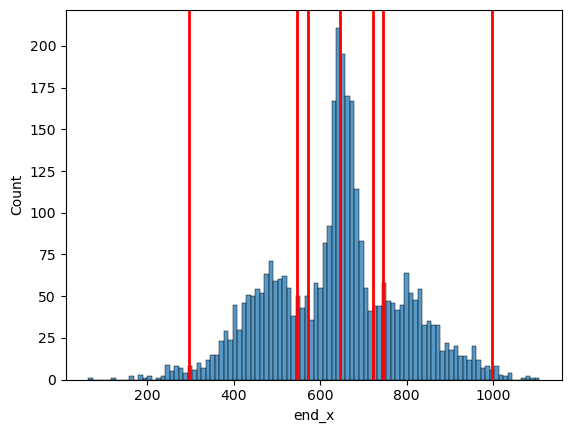

In [64]:
import matplotlib.pyplot as plt

saccades = saccades3

sns.histplot(saccades['end_x'], bins=100)

plt.axvline(saccades['end_x'].median(), c='r', lw=2)
plt.axvline(saccades['end_x'].median() - 75, c='r', lw=2)
plt.axvline(saccades['end_x'].median() + 75, c='r', lw=2)
plt.axvline(saccades['end_x'].median() - 100, c='r', lw=2)
plt.axvline(saccades['end_x'].median() + 100, c='r', lw=2)
plt.axvline(saccades['end_x'].median() + 350, c='r', lw=2)
plt.axvline(saccades['end_x'].median() - 350, c='r', lw=2)

In [68]:
import numpy as np

def get_fixation_targets(d):

    median = df['end_x'].median()
    bins = [-np.inf, median-350, median-100, median-75, median+75, median+100, median+350, np.inf]

    return pd.cut(df['end_x'], bins=bins, labels=['outside_left', 'left_option', 'center_left', 'fixation', 'center_right', 'right_option', 'outside_right'])

In [73]:
saccades2['fixation_target'] = get_fixation_targets(saccades2)

saccades2.groupby(['fixation_target']).size()

fixation_target
outside_left       77
left_option      1162
center_left        56
fixation          764
center_right       31
right_option     1433
outside_right      63
dtype: int64

In [81]:
messages

subject  run  block  trial  type    
03       1    1      1      rfx         5913266
                            gfx         5914110
                            response    5916574
                     2      rfx         5918913
                            gfx         5919743
                                         ...   
         5    4      23     gfx         8914074
                            response    8916395
                     24     rfx         8918844
                            gfx         8919653
                            response    8922090
Name: timestamp, Length: 1441, dtype: int64

In [80]:
saccades2.head(20)

n eye  end_timestamp  duration  \
subject run block trial start_timestamp                                    
02      1   1     1     89456            20   L          89470        16   
                        89640            21   L          89690        52   
                        89846            22   L          89894        50   
                        90146            23   L          90168        24   
                        90346            24   L          90370        26   
                        90578            25   L          90626        50   
                        90832            26   L          90872        42   
                        91110            27   L          91166        58   
                        91380            28   L          91438        60   
                        91656            29   L          91694        40   
                  2     94998            39   L          95022        26   
                        95240            40   L          95286        48   
                        95474            41   L          95520        48   
                        95810            42   L          95874        66   
                        96150            43   L          96176        28   
                        96436            44   L          96468        34   
                        96624            45   L          96682        60   
                        96894            46   L          96920        28   
                        97096            47   L          97132        38   
                        97252            48   L          97304        54   

                                         start_x  start_y   end_x  end_y  \
subject run block trial start_timestamp                                    
02      1   1     1     89456             1024.3    303.4  1027.6  325.1   
                        89640             1029.8    338.9   776.6  537.0   
                        89846              769.8    544.7  1033.0  335.0   
                        90146             1027.2    345.5  1043.8  393.0   
                        90346             1035.5    385.9  1028.2  334.2   
                        90578             1030.3    341.3   755.6  529.6   
                        90832              745.8    539.4   994.9  532.6   
                        91110              982.3    526.2   461.7  502.6   
                        91380              450.1    514.0   992.7  392.4   
                        91656              984.5    397.3   768.1  526.2   
                  2     94998             1008.0    475.4   949.0  429.0   
                        95240              938.7    427.1   680.6  443.4   
                        95474              672.3    442.6   440.6  438.1   
                        95810              437.9    440.8  1059.5  423.6   
                        96150             1057.2    422.7   959.6  441.3   
                        96436              950.2    450.3   935.0  558.0   
                        96624              931.4    560.2   445.0  507.5   
                        96894              429.4    513.0   348.6  513.0   
                        97096              353.8    515.4   545.5  521.6   
                        97252              543.1    525.0  1009.8  555.2   

                                           amp  peak_velocity fixation_target  
subject run block trial start_timestamp                                        
02      1   1     1     89456             0.65             53    right_option  
                        89640             8.65            308        fixation  
                        89846             9.07            407    right_option  
                        90146             1.48            103    right_option  
                        90346             1.56            107    right_option  
                        90578             8.84            376        fixation  
                        90832             6.20          

In [78]:
saccades1[np.in1d(saccades1['fixation_target'], ['left_option', 'fixatoin', 'right_option'])]

n eye  end_timestamp  duration  \
subject run block trial start_timestamp                                      
01      1   1     1     813926             20   L         813944        20   
                        814496             23   L         814524        30   
                        815170             26   L         815200        32   
                        815372             27   L         815434        64   
                        815680             28   L         815710        32   
...                                       ...  ..            ...       ...   
        5   4     23    3823368          1423   L        3823384        18   
                        3824226          1426   L        3824278        54   
                  24    3828602          1437   L        3828654        54   
                        3828906          1438   L        3828960        56   
                        3829218          1439   L        3829262        46   

                                         start_x  start_y  end_x  end_y  \
subject run block trial start_timestamp                                   
01      1   1     1     813926             542.1    467.1  499.1  499.3   
                        814496             656.7    511.8  818.0  497.0   
                        815170             650.6    509.3  842.4  510.2   
                        815372             832.2    503.4  496.6  475.9   
                        815680             468.4    480.3  477.7  464.3   
...                                          ...      ...    ...    ...   
        5   4     23    3823368            456.4    449.6  431.8  452.7   
                        3824226            714.5    495.1  473.5  494.5   
                  24    3828602            658.0    488.2  811.0  507.9   
                        3828906            816.0    488.1  514.5  493.8   
                        3829218            493.6    500.8  536.6  501.3   

                                           amp  peak_velocity fixation_target  
subject run block trial start_timestamp                                        
01      1   1     1     813926            1.66            136     left_option  
                        814496            5.16            421    right_option  
                        815170            6.11            505    right_option  
                        815372           10.72            577     left_option  
                        815680            0.55            121     left_option  
...                                        ...            ...             ...  
        5   4     23    3823368           0.79             85     left_option  
                        3824226           7.70            423     left_option  
                  24    3828602           4.91            371    right_option  
                        3828906           9.60            574     left_option  
                        3829218           1.37            125     left_option  

[2440 rows x 11 columns]

In [77]:
saccades1.head(40)

n eye  end_timestamp  duration  \
subject run block trial start_timestamp                                    
01      1   1     1     813556           19   L         813584        30   
                        813926           20   L         813944        20   
                        814086           21   L         814126        42   
                        814396           22   L         814402         8   
                        814496           23   L         814524        30   
                        814762           24   L         814792        32   
                        815008           25   L         815024        18   
                        815170           26   L         815200        32   
                        815372           27   L         815434        64   
                        815680           28   L         815710        32   
                        815950           29   L         815996        48   
                  2     819360           41   L         819384        26   
                        819958           42   L         819976        20   
                        820204           43   L         820226        24   
                        820798           44   L         820842        46   
                        821048           45   L         821108        62   
                  3     824736           53   L         824754        20   
                        825112           54   L         825132        22   
                        825350           55   L         825382        34   
                        825650           56   L         825670        22   
                        825904           57   L         825928        26   
                        826294           58   L         826300         8   
                        826430           59   L         826454        26   
                        826608           60   L         826662        56   
                        826848           61   L         826896        50   
                  4     830384           70   L         830408        26   
                        830634           71   L         830656        24   
                        831548           72   L         831576        30   
                        831742           73   L         831760        20   
                        832026           74   L         832034        10   
                        832428           75   L         832466        40   
                  5     836020           88   L         836040        22   
                        836322           89   L         836350        30   
                        836638           90   L         836654        18   
                        836928           91   L         836944        18   
                        837200           92   L         837222        24   
                        837560           93   L         837600        42   
                        837820           94   L         837852        34   
                        838180           95   L         838216        38   
                        838432           96   L         838452        22   

                                         start_x  start_y  end_x  end_y  \
subject run block trial start_timestamp                                   
01      1   1     1     813556             667.1    515.9  538.8  464.5   
                        813926             542.1    467.1  499.1  499.3   
                        814086             508.7    491.3  652.3  502.7   
                        814396             668.6    519.8  655.2  517.0   
                        814496             656.7    511.8  818.0  497.0   
                        814762             806.1    507.6  631.1  514.3   
                        815008             645.4    520.5  654.3  515.7   
                        815170             650.6    509.3  842.4  510.2   
                        815372             832.2    503.4  496.6  475.9   
                        

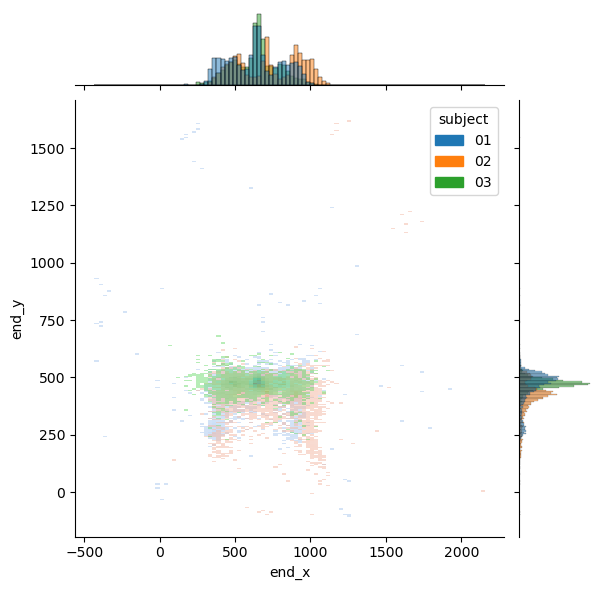

In [32]:
sns.jointplot(data=p
d.concat((saccades1, saccades2, saccades3)), x='end_x', y='end_y', hue='subject', kind='hist', alpha=.5)

In [28]:
sns.jointplot(data=pd.concat((saccades1, saccades2, saccades3)), x='end_x', y='end_y', kind="hex", color="#4CB391", hue='subject')

ValueError: Use of `hue` with `kind='hex'` is not currently supported.

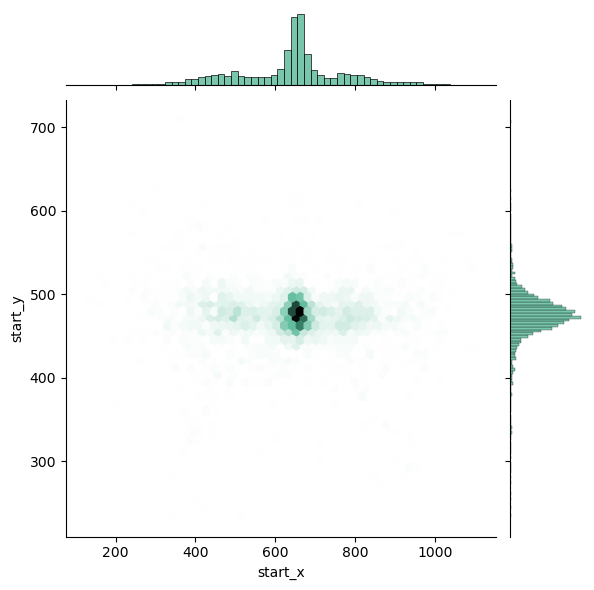

In [37]:
sns.jointplot(data=saccades_per_block, x='start_x', y='start_y', kind="hex", color="#4CB391")

<Axes: ylabel='Count'>

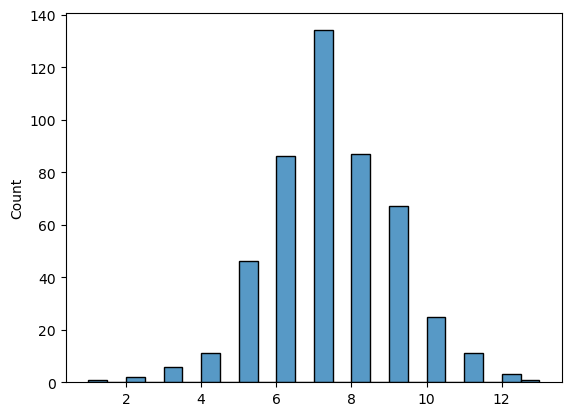

In [38]:
import seaborn as sns
sns.histplot(saccades_per_block.groupby(['run', 'block', 'trial']).size())

In [39]:
messages

type                         gfx  response      rfx
subject run block trial                            
03      1   1     1      5914110   5916574  5913266
                  2      5919743   5922209  5918913
                  3      5925330   5927609  5924518
                  4      5930910   5933210  5930096
                  5      5936481   5938941  5935673
...                          ...       ...      ...
        5   4     20     8897282   8899463  8896472
                  21     8902886   8905456  8902074
                  22     8908463   8911227  8907652
                  23     8914074   8916395  8913261
                  24     8919653   8922090  8918844

[480 rows x 3 columns]

In [40]:
saccades

n eye  end_timestamp  duration  start_x  \
subject run start_timestamp                                               
03      1   5906088             0   L        5906132        46    784.8   
            5906348             1   L        5906374        28    622.7   
            5906492             2   L        5906518        28    575.7   
            5906756             3   L        5906780        26    451.8   
            5906972             4   L        5906996        26    562.4   
...                           ...  ..            ...       ...      ...   
        5   8927078          1670   L        8927110        34    444.7   
            8927350          1671   L        8927382        34    411.9   
            8927732          1672   L        8927762        32    439.3   
            8928012          1673   L        8928044        34    376.1   
            8928438          1674   L        8928494        58    427.4   

                             start_y  end_x  end_y    amp  peak_velocity  
subject run start_timestamp                                               
03      1   5906088            496.5  633.3  474.7   4.89            529  
            5906348            477.1  576.1  463.2   1.55            202  
            5906492            472.6  452.1  490.3   3.98            308  
            5906756            492.8  571.7  502.1   3.83            327  
            5906972            494.3  680.7  504.4   3.80            299  
...                              ...    ...    ...    ...            ...  
        5   8927078            421.7  420.7  460.7   1.37            182  
            8927350            455.3  439.2  377.9   2.41            245  
            8927732            394.2  392.1  507.7   3.61            315  
            8928012            498.3  430.3  469.5   1.90            224  
            8928438            454.4  756.8  628.4  11.58            701  

[8260 rows x 10 columns]

In [4]:
import bambi as bmb

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [12]:
df = pd.DataFrame(np.random.randn(100, 3), columns=['x', 'y', 'z'])

df['subject'] = np.repeat(np.arange(10)+1, 10)

In [20]:
model = bmb.Model('y ~ bs(x, df=5)*bs(z, df=5)+(bs(x, df=5)*bs(z, df=5)|subject)', data=df)

idata = model.fit()

TypeError: You are calling an Aesara function with PyTensor variables.
Starting with PyMC 5.0, Aesara was replaced by PyTensor (see https://www.pymc.io/blog/pytensor_announcement.html).
Replace your import of aesara.tensor with pytensor.tensor.